In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("input/train_indessa.csv")
print("Shape: ", data.shape)

Shape:  (532428, 45)


In [3]:
# Work on the most important features found in first dive
major = ['tot_cur_bal', 'last_week_pay', 'total_rev_hi_lim', 'int_rate']

In [4]:
data[major].dtypes

tot_cur_bal         float64
last_week_pay        object
total_rev_hi_lim    float64
int_rate            float64
dtype: object

## Preprocessing

In [5]:
data = data.fillna("0")

In [6]:
data['total_rev_hi_lim'] = data['total_rev_hi_lim'].astype(int)

In [7]:
data['tot_cur_bal'] = data['tot_cur_bal'].astype(float)

In [8]:
# Values (36months, 60months) into int 

data['term'] = data['term'].str.extract('(\d+)', expand=False).astype(int)
data = data.fillna("0")
data['term'] = data['term'].astype(int)

In [9]:
# Values (126th weeks, ...) into int

data['last_week_pay'] = data['last_week_pay'].str.extract('(\d+)', expand=False)
data = data.fillna("0")
data['last_week_pay'] = data['last_week_pay'].astype(int)

In [10]:
# Create a new feature = last_week_pay / term

data.insert(0, 'payment_completion', (data['last_week_pay']/(data['term']/12*52+1))*100)
data['payment_completion'] = data['payment_completion'].astype(int)

## Visualisation

In [11]:
tcb_0 = data[data['loan_status'] == 0]['tot_cur_bal']
tcb_1 = data[data['loan_status'] == 1]['tot_cur_bal']
lwp_0 = data[data['loan_status'] == 0]['last_week_pay']
lwp_1 = data[data['loan_status'] == 1]['last_week_pay']
pc_0 = data[data['loan_status'] == 0]['payment_completion']
pc_1 = data[data['loan_status'] == 1]['payment_completion']
trhl_0 = data[data['loan_status'] == 0]['total_rev_hi_lim']
trhl_1 = data[data['loan_status'] == 1]['total_rev_hi_lim']
ir_0 = data[data['loan_status'] == 0]['int_rate']
ir_1 = data[data['loan_status'] == 1]['int_rate']

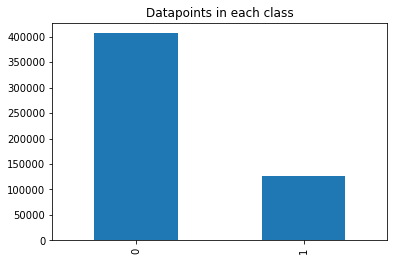

In [12]:
# Detect class imbalance problem
data.loan_status.value_counts().plot(kind="bar", 
                title="Datapoints in each class")

### Classes Distribution in Each Variables

Use only 100000 datapoints from each class to prevent class imbalance problem

[]

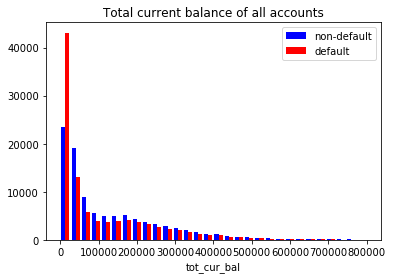

In [13]:
plt.hist([tcb_0[:100000], tcb_1[:100000]], 30, range=(0,800000),
         histtype='bar', color=['b','r'], 
         label=['non-default', 'default'])
plt.legend(prop={'size': 10})
plt.xlabel('tot_cur_bal')
plt.title("Total current balance of all accounts")
plt.plot()

**Observation**: Borrowers with less balance in all accounts are more probable to default

[]

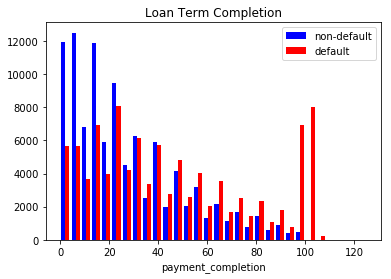

In [14]:
plt.hist([pc_0[:100000], pc_1[:100000]], 30, range=(0,125),
         histtype='bar', color=['b','r'], 
         label=['non-default', 'default'])
plt.legend(prop={'size': 10})
plt.xlabel('payment_completion')
plt.title("Loan Term Completion")
plt.plot()

**Observation** : At the beginning of loan term, only some borrowers default. But more borrowers default at later stage of loan term.

[]

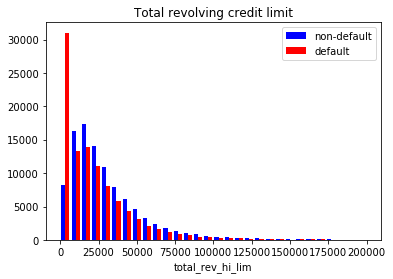

In [15]:
plt.hist([trhl_0[:100000], trhl_1[:100000]], 30, range=(0, 200000),
         histtype='bar', color=['b','r'], 
         label=['non-default', 'default'])
plt.legend(prop={'size': 10})
plt.xlabel('total_rev_hi_lim')
plt.title("Total revolving credit limit")
plt.plot()

**Observation**: Borrowers with less total revolving credit limit are more likely to default.

[]

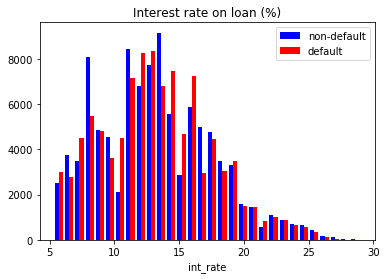

In [16]:
plt.hist([ir_0[:100000], ir_1[:100000]], 30,
         histtype='bar', color=['b','r'], 
         label=['non-default', 'default'])
plt.legend(prop={'size': 10})
plt.xlabel('int_rate')
plt.title('Interest rate on loan (%)')
plt.plot()

**Observation**: Although borrowers of loan with certain interest rate are more likely, the distribution is imbalance. Not a good predictor.

### Relations between Multiple Variables

In [17]:
# Scale variables
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
data['tot_cur_bal'] = norm.fit_transform(data[['tot_cur_bal']])

In [18]:
norm_last = MinMaxScaler()
data['last_week_pay'] = norm_last.fit_transform(data[['last_week_pay']])

In [19]:
tcb_0 = data[data['loan_status'] == 0]['tot_cur_bal']
tcb_1 = data[data['loan_status'] == 1]['tot_cur_bal']
lwp_0 = data[data['loan_status'] == 0]['last_week_pay']
lwp_1 = data[data['loan_status'] == 1]['last_week_pay']
pc_0 = data[data['loan_status'] == 0]['payment_completion']
pc_1 = data[data['loan_status'] == 1]['payment_completion']
trhl_0 = data[data['loan_status'] == 0]['total_rev_hi_lim']
trhl_1 = data[data['loan_status'] == 1]['total_rev_hi_lim']
ir_0 = data[data['loan_status'] == 0]['int_rate']
ir_1 = data[data['loan_status'] == 1]['int_rate']

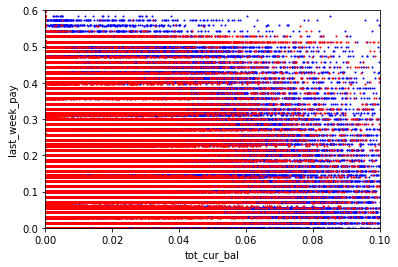

In [20]:
plt.scatter(tcb_0, lwp_0, c='b', s=1)
plt.scatter(tcb_1, lwp_1, c='r', s=1)
plt.xlabel('tot_cur_bal')
plt.ylabel('last_week_pay')
plt.xlim(0, .1)
plt.ylim(0, .6)
plt.show()

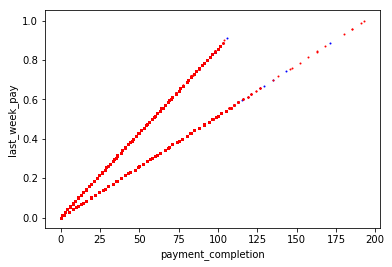

In [21]:
plt.scatter(pc_0, lwp_0, c='b', s=1)
plt.scatter(pc_1, lwp_1, c='r', s=1)
plt.xlabel('payment_completion')
plt.ylabel('last_week_pay')
plt.show()

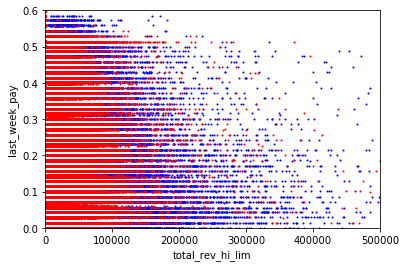

In [22]:
plt.scatter(trhl_0, lwp_0, c='b', s=1)
plt.scatter(trhl_1, lwp_1, c='r', s=1)
plt.xlabel('total_rev_hi_lim')
plt.ylabel('last_week_pay')
plt.xlim(0, 500000)
plt.ylim(0, .6)
plt.show()

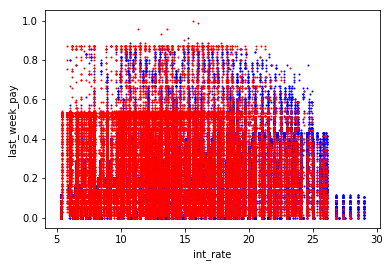

In [23]:
plt.scatter(ir_0, lwp_0, c='b', s=1)
plt.scatter(ir_1, lwp_1, c='r', s=1)
plt.xlabel('int_rate')
plt.ylabel('last_week_pay')
plt.show()